## Requirements

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Preparation

In [72]:
df_test = pd.read_csv("data/data_test.csv", encoding='utf-8')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2160 non-null   int64  
 1   tanggal_waktu      2160 non-null   object 
 2   suhu               2160 non-null   float64
 3   beban_listrik      2160 non-null   float64
 4   kecepatan_angin    2160 non-null   float64
 5   tekanan_udara      2160 non-null   float64
 6   dampak_lingkungan  2160 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 118.3+ KB


In [73]:
df_train = pd.read_csv("data/data_train.csv", encoding='utf-8')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 24336 non-null  int64  
 1   tanggal_waktu      24336 non-null  object 
 2   suhu               24336 non-null  float64
 3   beban_listrik      24336 non-null  float64
 4   kecepatan_angin    24336 non-null  float64
 5   tekanan_udara      24336 non-null  float64
 6   dampak_lingkungan  24336 non-null  object 
 7   konsumsi_listrik   24283 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


## Preprocessing

In [74]:
# Ubah tipe data menjadi datetime
df_train["tanggal_waktu"] = pd.to_datetime(df_train["tanggal_waktu"])
df_test["tanggal_waktu"] = pd.to_datetime(df_test["tanggal_waktu"])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 24336 non-null  int64         
 1   tanggal_waktu      24336 non-null  datetime64[ns]
 2   suhu               24336 non-null  float64       
 3   beban_listrik      24336 non-null  float64       
 4   kecepatan_angin    24336 non-null  float64       
 5   tekanan_udara      24336 non-null  float64       
 6   dampak_lingkungan  24336 non-null  object        
 7   konsumsi_listrik   24283 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.5+ MB


In [75]:
# Cek missing values
print(df_train.isnull().sum())

ID                    0
tanggal_waktu         0
suhu                  0
beban_listrik         0
kecepatan_angin       0
tekanan_udara         0
dampak_lingkungan     0
konsumsi_listrik     53
dtype: int64


In [76]:
# Cek missing values
print(df_test.isnull().sum())

ID                   0
tanggal_waktu        0
suhu                 0
beban_listrik        0
kecepatan_angin      0
tekanan_udara        0
dampak_lingkungan    0
dtype: int64


In [77]:
# Isi missing values jika ada
df_train["tekanan_udara"] = df_train["tekanan_udara"].fillna(df_train["tekanan_udara"].interpolate())
df_train["konsumsi_listrik"] = df_train["konsumsi_listrik"].fillna(method="ffill")

print(df_train.isnull().sum())

ID                   0
tanggal_waktu        0
suhu                 0
beban_listrik        0
kecepatan_angin      0
tekanan_udara        0
dampak_lingkungan    0
konsumsi_listrik     0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30488\1436221346.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train["konsumsi_listrik"] = df_train["konsumsi_listrik"].fillna(method="ffill")


In [78]:
# Encode dampak_lingkungan
df_train = pd.get_dummies(df_train, columns=["dampak_lingkungan"])
df_test = pd.get_dummies(df_test, columns=["dampak_lingkungan"])

df_train.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik,dampak_lingkungan_A,dampak_lingkungan_B,dampak_lingkungan_C
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,216.0,True,False,False
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,210.0,True,False,False
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,225.0,True,False,False
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,216.0,True,False,False
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,222.0,True,False,False


In [79]:
df_test.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan_A,dampak_lingkungan_B,dampak_lingkungan_C
0,32184,2025-05-20 00:00:00,27.8,7.1,2.075,980.0,True,False,False
1,32185,2025-05-20 01:00:00,26.2,7.1,5.005,988.0,True,False,False
2,32186,2025-05-20 02:00:00,27.4,6.4,7.385,990.0,True,False,False
3,32187,2025-05-20 03:00:00,26.6,9.3,1.890,973.0,True,False,False
4,32188,2025-05-20 04:00:00,26.2,9.3,2.540,989.0,True,False,False


In [80]:
# Sort sesuai dengan tanggal_waktu
df_cleaned = df_train.sort_values("tanggal_waktu")
df_test = df_test.sort_values("tanggal_waktu")
df_cleaned.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik,dampak_lingkungan_A,dampak_lingkungan_B,dampak_lingkungan_C
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,216.0,True,False,False
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,210.0,True,False,False
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,225.0,True,False,False
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,216.0,True,False,False
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,222.0,True,False,False


In [81]:
# Cek outlier
df_cleaned.describe()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik
count,24336.000000,24336,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000
mean,16027.381657,2023-07-16 19:22:53.964496896,25.161082,-1.783510,23.631823,986.012964,531.997411
min,0.000000,2021-09-17 00:00:00,12.700000,-32.900000,1.075000,953.000000,174.000000
25%,8051.750000,2022-08-18 11:45:00,21.100000,-10.700000,3.165000,977.000000,219.000000
50%,16079.500000,2023-07-18 23:30:00,25.800000,-1.400000,6.670000,986.000000,270.000000
75%,24155.250000,2024-06-19 11:15:00,29.400000,7.900000,22.700000,995.000000,342.000000
max,32183.000000,2025-05-19 23:00:00,35.300000,18.600000,586.600000,1024.000000,99999.000000
std,9299.957517,NaN,4.888658,10.521302,46.781818,12.130831,4820.776434


In [82]:
df_test.describe()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara
count,2160.000000,2160,2160.000000,2160.000000,2160.000000,2160.000000
mean,33545.633333,2025-07-15 17:37:59.999999744,23.883611,-3.411574,27.656924,991.381481
min,32184.000000,2025-05-20 00:00:00,15.500000,-22.100000,1.075000,965.000000
25%,32915.750000,2025-06-19 11:45:00,20.600000,-11.400000,2.790000,985.000000
50%,33623.500000,2025-07-18 23:30:00,24.200000,-3.600000,5.195000,992.000000
75%,34355.250000,2025-08-18 11:15:00,27.000000,5.000000,17.026250,998.000000
max,34895.000000,2025-09-09 23:00:00,34.100000,13.600000,442.930000,1016.000000
std,820.783400,NaN,3.874791,9.139108,62.632300,9.098241


In [83]:
df_train_interpolated = df_cleaned.copy()

# 1. Hitung batas atas
Q1 = df_train_interpolated['konsumsi_listrik'].quantile(0.25)
Q3 = df_train_interpolated['konsumsi_listrik'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# 2. Ganti outlier dengan NaN
df_train_interpolated.loc[df_train_interpolated['konsumsi_listrik'] > upper_bound, 'konsumsi_listrik'] = np.nan

# 3. Lakukan interpolasi berbasis waktu
df_train_interpolated.set_index('tanggal_waktu', inplace=True)
df_train_interpolated['konsumsi_listrik'].interpolate(method='time', inplace=True)
df_train_interpolated.reset_index(inplace=True) # Kembalikan index seperti semula

print("Proses Interpolasi selesai. Gunakan 'df_train_interpolated' untuk training.")

df_train_interpolated.info()

Proses Interpolasi selesai. Gunakan 'df_train_interpolated' untuk training.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tanggal_waktu        24336 non-null  datetime64[ns]
 1   ID                   24336 non-null  int64         
 2   suhu                 24336 non-null  float64       
 3   beban_listrik        24336 non-null  float64       
 4   kecepatan_angin      24336 non-null  float64       
 5   tekanan_udara        24336 non-null  float64       
 6   konsumsi_listrik     24336 non-null  float64       
 7   dampak_lingkungan_A  24336 non-null  bool          
 8   dampak_lingkungan_B  24336 non-null  bool          
 9   dampak_lingkungan_C  24336 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(5), int64(1)
memory usage: 1.4 MB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30488\3510887517.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_interpolated['konsumsi_listrik'].interpolate(method='time', inplace=True)


In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2160 non-null   int64         
 1   tanggal_waktu        2160 non-null   datetime64[ns]
 2   suhu                 2160 non-null   float64       
 3   beban_listrik        2160 non-null   float64       
 4   kecepatan_angin      2160 non-null   float64       
 5   tekanan_udara        2160 non-null   float64       
 6   dampak_lingkungan_A  2160 non-null   bool          
 7   dampak_lingkungan_B  2160 non-null   bool          
 8   dampak_lingkungan_C  2160 non-null   bool          
dtypes: bool(3), datetime64[ns](1), float64(4), int64(1)
memory usage: 107.7 KB


In [85]:
df_train_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tanggal_waktu        24336 non-null  datetime64[ns]
 1   ID                   24336 non-null  int64         
 2   suhu                 24336 non-null  float64       
 3   beban_listrik        24336 non-null  float64       
 4   kecepatan_angin      24336 non-null  float64       
 5   tekanan_udara        24336 non-null  float64       
 6   konsumsi_listrik     24336 non-null  float64       
 7   dampak_lingkungan_A  24336 non-null  bool          
 8   dampak_lingkungan_B  24336 non-null  bool          
 9   dampak_lingkungan_C  24336 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(5), int64(1)
memory usage: 1.4 MB


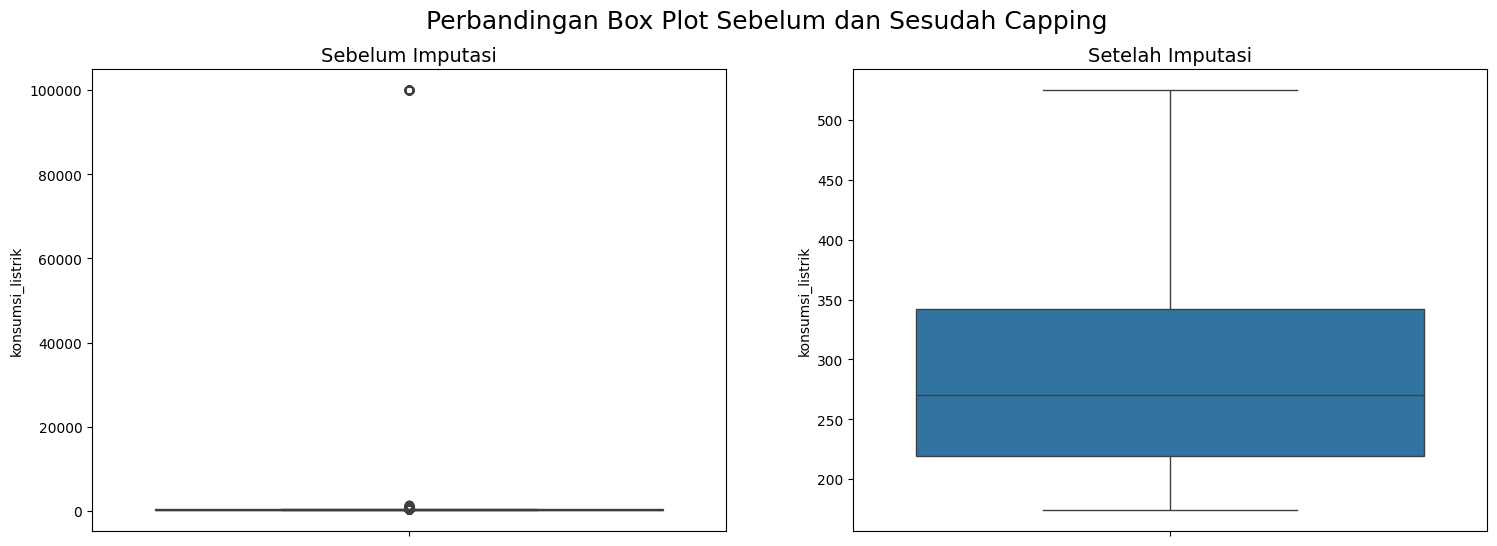

In [86]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_train['konsumsi_listrik'])
plt.title('Sebelum Imputasi', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(y=df_train_interpolated['konsumsi_listrik'])
plt.title('Setelah Imputasi', fontsize=14)

plt.suptitle('Perbandingan Box Plot Sebelum dan Sesudah Capping', fontsize=18)
plt.show()

## EDA

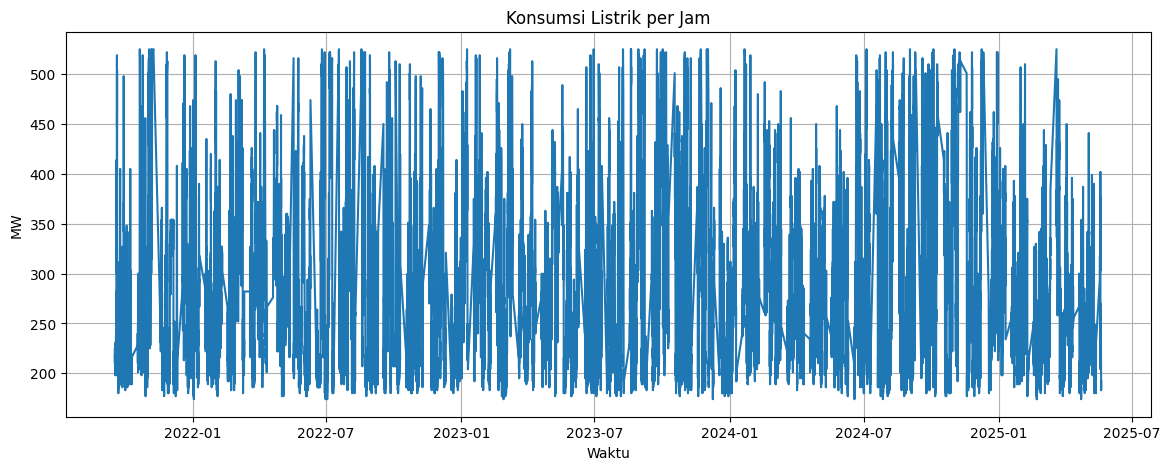

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi konsumsi listrik
plt.figure(figsize=(14,5))
plt.plot(df_train_interpolated["tanggal_waktu"], df_train_interpolated["konsumsi_listrik"])
plt.title("Konsumsi Listrik per Jam")
plt.xlabel("Waktu")
plt.ylabel("MW")
plt.grid(True)
plt.show()

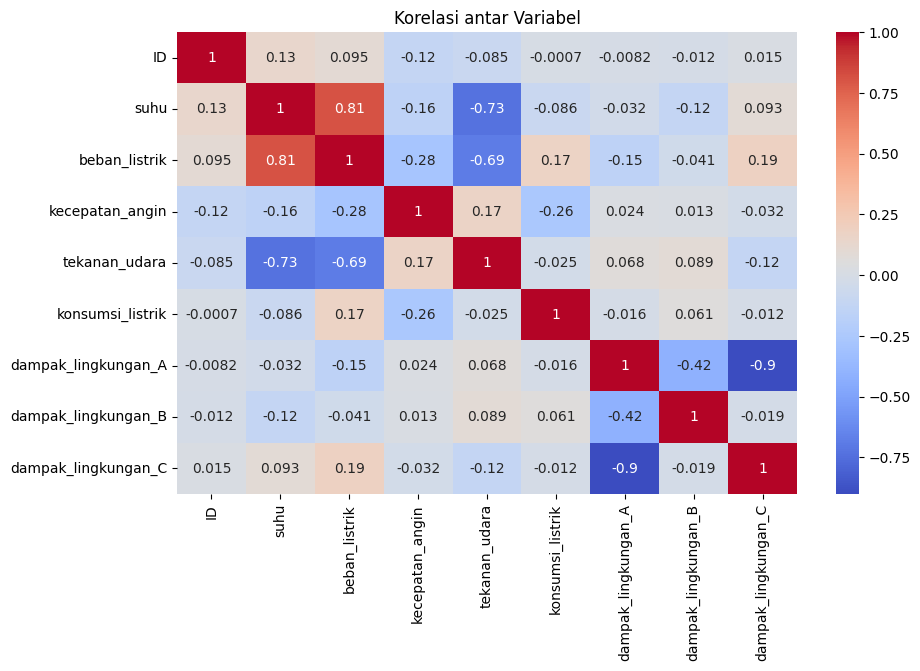

In [88]:
# Korelasi antar fitur
plt.figure(figsize=(10,6))
sns.heatmap(df_train_interpolated.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasi antar Variabel")
plt.show()

## Modelling

### LSTM

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [90]:
# Fitur yang digunakan
features = ["suhu", "beban_listrik", "kecepatan_angin", "tekanan_udara",
            "dampak_lingkungan_A", "dampak_lingkungan_B", "dampak_lingkungan_C"]

# Normalisasi
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_train_interpolated[features])
scaled_target = scaler.fit_transform(df_train_interpolated[["konsumsi_listrik"]])

In [91]:
# Buat sequence untuk LSTM
def create_sequences(features, target, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(features)):
        X.append(features[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, scaled_target)

In [92]:
# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, shuffle=False, test_size=0.2)

In [93]:
# Model LSTM
model_lstm = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
# Train model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0503 - val_loss: 0.0335
Epoch 2/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0385 - val_loss: 0.0295
Epoch 3/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0363 - val_loss: 0.0333
Epoch 4/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0347 - val_loss: 0.0363
Epoch 5/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0337 - val_loss: 0.0397
Epoch 6/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0332 - val_loss: 0.0423
Epoch 7/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0332 - val_loss: 0.0405
Epoch 8/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0331 - val_loss: 0.0308
Epoch 9/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0313 - val_loss: 0.0334
Epoch 10/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0315 - val_loss: 0.0352
Epoch 11/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0310 - val_loss: 0.0370
Epoch 12/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [95]:
# Prediksi
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform
y_pred_inv_lstm = scaler.inverse_transform(np.hstack((np.zeros((y_pred_lstm.shape[0], len(features))), y_pred_lstm)))[:, -1]
y_test_inv_lstm = scaler.inverse_transform(np.hstack((np.zeros((y_test_lstm.shape[0], len(features))), y_test_lstm)))[:, -1]

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


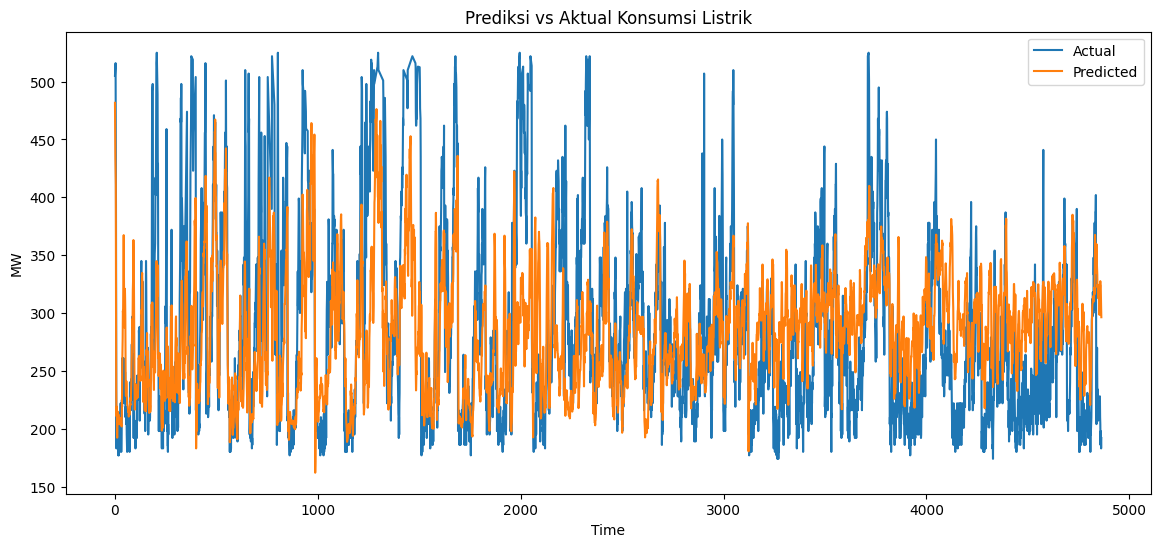

In [96]:
# Visualisasi hasil
plt.figure(figsize=(14,6))
plt.plot(y_test_inv_lstm, label="Actual")
plt.plot(y_pred_inv_lstm, label="Predicted")
plt.title("Prediksi vs Aktual Konsumsi Listrik")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend() 
plt.show()

### XGBoost

In [ ]:
%pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split

def create_features_for_tree_models(df):
    """
    Membuat fitur berbasis waktu dari kolom 'tanggal_waktu'. 
    """
    df_copy = df.copy()
    df_copy['jam'] = df_copy['tanggal_waktu'].dt.hour
    df_copy['hari_minggu'] = df_copy['tanggal_waktu'].dt.dayofweek # Senin=0, Minggu=6
    df_copy['hari_bulan'] = df_copy['tanggal_waktu'].dt.day
    df_copy['hari_tahun'] = df_copy['tanggal_waktu'].dt.dayofyear
    df_copy['minggu_tahun'] = df_copy['tanggal_waktu'].dt.isocalendar().week.astype(int)
    df_copy['bulan'] = df_copy['tanggal_waktu'].dt.month
    df_copy['tahun'] = df_copy['tanggal_waktu'].dt.year

    # Menambahkan fitur lag (nilai dari waktu sebelumnya)
    # Kita menggunakan data konsumsi listrik dari 24 jam sebelumnya sebagai fitur
    df_copy['lag_24h_konsumsi'] = df_copy['konsumsi_listrik'].shift(24)
    
    # Menambahkan fitur rolling window (rata-rata bergerak)
    # Rata-rata konsumsi listrik dalam 3 jam terakhir
    df_copy['rolling_mean_3h_konsumsi'] = df_copy['konsumsi_listrik'].rolling(window=3).mean().shift(1)

    return df_copy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
# Terapkan fungsi ke data training Anda
df_train_xgb = create_features_for_tree_models(df_train_interpolated)

# Fitur baru akan menciptakan nilai NaN di awal data, jadi kita hapus baris tersebut
df_train_xgb = df_train_xgb.dropna()

print("Feature engineering untuk data training selesai.")
df_train_xgb.head()

Feature engineering untuk data training selesai.


,tanggal_waktu,ID,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik,dampak_lingkungan_A,dampak_lingkungan_B,dampak_lingkungan_C,jam,hari_minggu,hari_bulan,hari_tahun,minggu_tahun,bulan,tahun,lag_24h_konsumsi,rolling_mean_3h_konsumsi
24,2021-09-18 00:00:00,24,17.4,-14.3,76.350,1003.0,210.0,True,False,False,0,5,18,261,37,9,2021,216.0,216.0
25,2021-09-18 01:00:00,25,17.8,-17.1,5.770,1011.0,231.0,True,False,False,1,5,18,261,37,9,2021,210.0,212.0
26,2021-09-18 02:00:00,26,17.4,-14.3,10.065,1000.0,210.0,True,False,False,2,5,18,261,37,9,2021,225.0,219.0
27,2021-09-18 03:00:00,27,16.3,-15.7,5.520,997.0,213.0,True,False,False,3,5,18,261,37,9,2021,216.0,217.0
28,2021-09-18 04:00:00,28,16.3,-14.3,4.770,1016.0,204.0,True,False,False,4,5,18,261,37,9,2021,222.0,218.0


In [99]:
# Tentukan fitur dan target
features_xgb = [col for col in df_train_xgb.columns if col not in ['ID', 'tanggal_waktu', 'beban_listrik']]
target_xgb = 'konsumsi_listrik'

In [100]:
X = df_train_xgb[features_xgb]
y = df_train_xgb[target_xgb]

In [101]:
# Split data untuk training dan validasi (80% train, 20% test)
X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, shuffle=False)


In [102]:
# Inisialisasi dan training model XGBoost
xgb_reg = xgb.XGBRegressor(
    n_estimators=1000,          # Jumlah tree
    learning_rate=0.05,         # Laju pembelajaran
    max_depth=5,                # Kedalaman maksimum tree
    early_stopping_rounds=50,   # Berhenti jika performa tidak membaik setelah 50 iterasi
    random_state=42
)

In [103]:
print("Memulai training model XGBoost...")
xgb_reg.fit(
    X_train, y_train_xgb,
    eval_set=[(X_test, y_test_xgb)], # Data untuk memonitor performa
    verbose=100                  # Menampilkan log setiap 100 iterasi
)
print("Training selesai.")

Memulai training model XGBoost...
[0]	validation_0-rmse:83.18416
[100]	validation_0-rmse:0.63620
[200]	validation_0-rmse:0.38656
[242]	validation_0-rmse:0.38813
Training selesai.


In [104]:
# Prediksi pada set data tes lokal
y_pred_xgb = xgb_reg.predict(X_test)

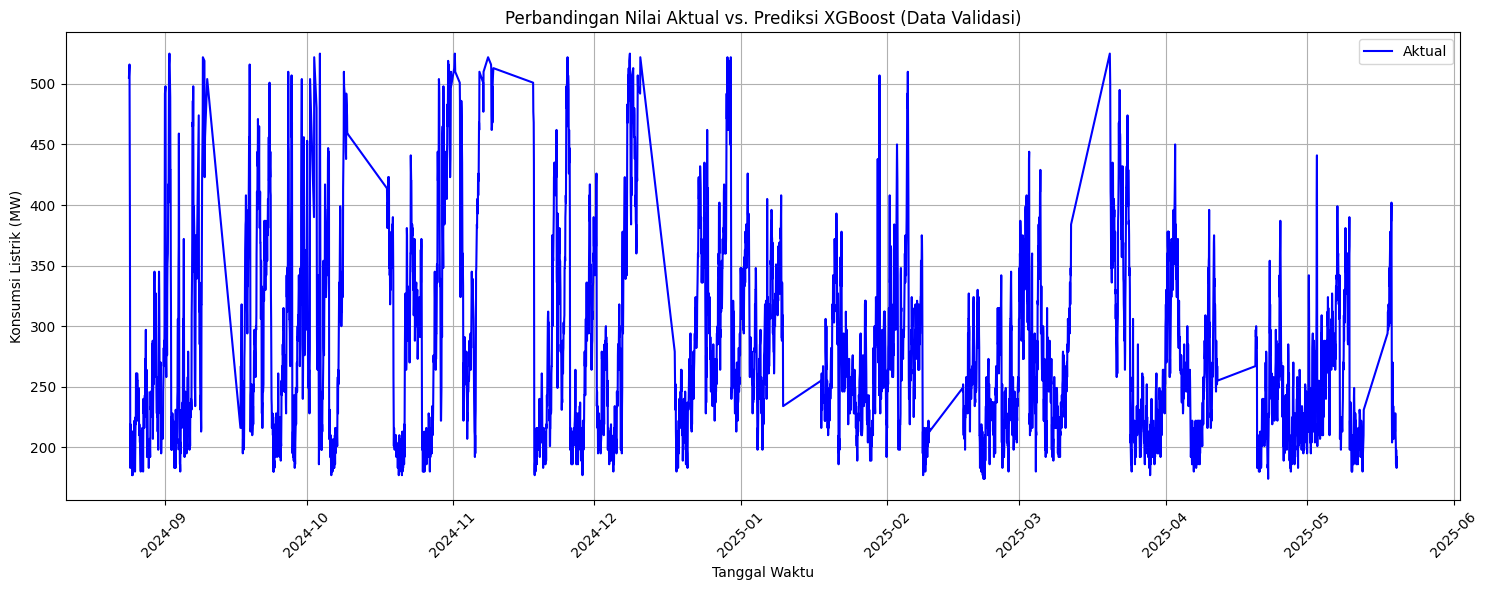

In [105]:
# --- Visualisasi Hasil Training XGBoost ---
test_dates = df_train_xgb.iloc[-len(y_test_xgb):]['tanggal_waktu']

plt.figure(figsize=(15, 6))

# Plot data aktual dan prediksi terhadap tanggal yang benar
plt.plot(test_dates, y_test_xgb.values, label="Aktual", color='blue')
# plt.plot(test_dates, y_pred_xgb, label="Prediksi", color='red')

plt.title("Perbandingan Nilai Aktual vs. Prediksi XGBoost (Data Validasi)")
plt.xlabel("Tanggal Waktu")
plt.ylabel("Konsumsi Listrik (MW)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotasi label tanggal agar lebih mudah dibaca
plt.tight_layout() # Menyesuaikan plot agar tidak ada yang terpotong
plt.show()

### LightGBM

In [106]:
%pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import train_test_split

print("LightGBM berhasil di-import.")


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 789.6 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 789.6 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 724.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
LightGBM berhasil di-import.


In [107]:
def create_comprehensive_features(df):
    """
    Membuat fitur-fitur komprehensif untuk model berbasis tree.
    """
    df_copy = df.copy()
    df_copy['tanggal_waktu'] = pd.to_datetime(df_copy['tanggal_waktu'])
    
    # 1. Fitur Waktu (Time-Based Features)
    df_copy['jam'] = df_copy['tanggal_waktu'].dt.hour
    df_copy['hari_minggu'] = df_copy['tanggal_waktu'].dt.dayofweek
    df_copy['hari_bulan'] = df_copy['tanggal_waktu'].dt.day
    df_copy['hari_tahun'] = df_copy['tanggal_waktu'].dt.dayofyear
    df_copy['minggu_tahun'] = df_copy['tanggal_waktu'].dt.isocalendar().week.astype(int)
    df_copy['bulan'] = df_copy['tanggal_waktu'].dt.month
    df_copy['tahun'] = df_copy['tanggal_waktu'].dt.year
    df_copy['kuartal'] = df_copy['tanggal_waktu'].dt.quarter
    
    # 2. Fitur Lag (Nilai dari waktu sebelumnya)
    # Ini sangat penting untuk memberi tahu model kondisi sebelumnya.
    def create_lags(df, column, lags):
        for lag in lags:
            df[f'lag_{column}_{lag}h'] = df[column].shift(lag)
        return df
        
    # Membuat lag untuk konsumsi dan fitur penting lainnya
    if 'konsumsi_listrik' in df.columns:
         df_copy = create_lags(df_copy, 'konsumsi_listrik', [24, 48, 168]) # 1 hari, 2 hari, 1 minggu lalu
    df_copy = create_lags(df_copy, 'suhu', [24, 48])
    df_copy = create_lags(df_copy, 'beban_listrik', [24, 48])
    
    # 3. Fitur Rolling Window (Statistik Bergerak)
    # Ini membantu menangkap tren jangka pendek.
    def create_rolling(df, column, windows):
        for window in windows:
            df[f'rolling_mean_{column}_{window}h'] = df[column].rolling(window=window).mean().shift(1)
            df[f'rolling_std_{column}_{window}h'] = df[column].rolling(window=window).std().shift(1)
        return df

    if 'konsumsi_listrik' in df.columns:
        df_copy = create_rolling(df_copy, 'konsumsi_listrik', [3, 6, 24])
    df_copy = create_rolling(df_copy, 'suhu', [6, 24])

    return df_copy

# Terapkan fungsi ke data training
df_train_lgbm = create_comprehensive_features(df_train_interpolated)

# Hapus baris dengan nilai NaN yang dihasilkan oleh fitur lag/rolling
df_train_lgbm = df_train_lgbm.dropna()

print("✅ Feature engineering komprehensif untuk data training selesai.")
print("Jumlah fitur baru:", len(df_train_lgbm.columns) - len(df_train.columns))

✅ Feature engineering komprehensif untuk data training selesai.
Jumlah fitur baru: 25


In [108]:
# Tentukan fitur dan target
features_lgbm = [col for col in df_train_lgbm.columns if col not in ['ID', 'tanggal_waktu', 'konsumsi_listrik']]
target_lgbm = 'konsumsi_listrik'

X = df_train_lgbm[features_lgbm]
y = df_train_lgbm[target_lgbm]

# Split data untuk training dan validasi (misal: 2 bulan terakhir untuk validasi)
train_until = df_train_lgbm['tanggal_waktu'].max() - pd.DateOffset(months=2)
X_train = df_train_lgbm[df_train_lgbm['tanggal_waktu'] < train_until][features_lgbm]
y_train = df_train_lgbm[df_train_lgbm['tanggal_waktu'] < train_until][target_lgbm]
X_test = df_train_lgbm[df_train_lgbm['tanggal_waktu'] >= train_until][features_lgbm]
y_test = df_train_lgbm[df_train_lgbm['tanggal_waktu'] >= train_until][target_lgbm]

# Inisialisasi dan training model LightGBM
lgbm_reg = lgb.LGBMRegressor(
    objective='regression_l1', # MAE, lebih robust terhadap outlier
    n_estimators=2000,
    learning_rate=0.01,
    num_leaves=31,
    max_depth=-1,
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.7,
    subsample=0.7
)

print("🚀 Memulai training model LightGBM...")
lgbm_reg.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100, verbose=True)] # Berhenti jika performa tidak membaik setelah 100 iterasi
)
print("✅ Training selesai.")

🚀 Memulai training model LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 23016, number of used features: 32
[LightGBM] [Info] Start training from score 270.000000
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1107]	valid_0's rmse: 25.7155	valid_0's l1: 18.591
✅ Training selesai.


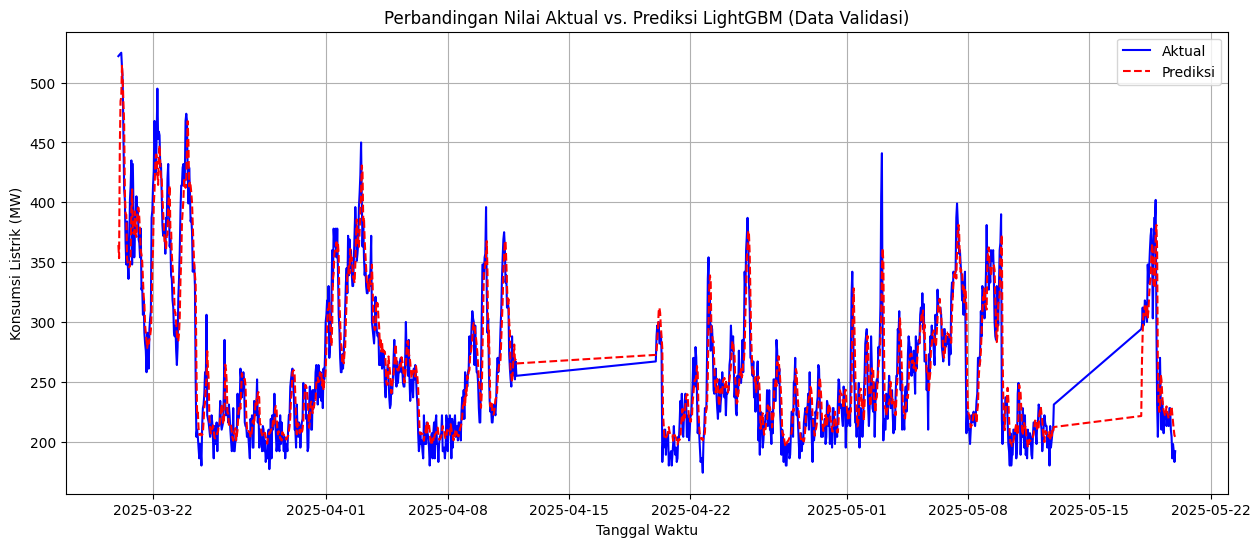

In [109]:
# Prediksi pada set data validasi
y_pred_lgbm = lgbm_reg.predict(X_test)

# Visualisasi Aktual vs. Prediksi
test_dates = df_train_lgbm[df_train_lgbm['tanggal_waktu'] >= train_until]['tanggal_waktu']
plt.figure(figsize=(15, 6))
plt.plot(test_dates, y_test.values, label="Aktual", color='blue')
plt.plot(test_dates, y_pred_lgbm, label="Prediksi", color='red', linestyle='--')
plt.title("Perbandingan Nilai Aktual vs. Prediksi LightGBM (Data Validasi)")
plt.xlabel("Tanggal Waktu")
plt.ylabel("Konsumsi Listrik (MW)")
plt.legend()
plt.grid(True)
plt.show()

## Evaluasi

In [110]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [111]:
def evaluate_model(df_test, forecast):
    mse = mean_squared_error(df_test, forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(df_test, forecast)
    mape = mean_absolute_percentage_error(df_test, forecast)

    # print(f'p = {p}, d = {d}, q = {q}')
    print(f'MSE = {mse:.4f}')
    print(f'RMSE = {rmse:.4f}')
    print(f'R² = {r2:.4f}')
    print(f'MAPE = {mape:.4f}')

### LSTM

In [112]:
evaluate_model(y_test_inv_lstm, y_pred_inv_lstm)

MSE = 5291.5727
RMSE = 72.7432
R² = 0.3090
MAPE = 0.1866


### XGBoost

In [113]:
# Evaluasi model
print("\n--- Hasil Evaluasi Model XGBoost ---")
evaluate_model(y_test_xgb, y_pred_xgb)


--- Hasil Evaluasi Model XGBoost ---
MSE = 0.1492
RMSE = 0.3863
R² = 1.0000
MAPE = 0.0003


### LigtGBM

In [114]:
# Evaluasi model
print("\n--- Hasil Evaluasi Model LightGBM ---")
evaluate_model(y_test, y_pred_lgbm)


--- Hasil Evaluasi Model LightGBM ---
MSE = 661.2877
RMSE = 25.7155
R² = 0.8457
MAPE = 0.0713


## Prediction

In [115]:
import pandas as pd
import numpy as np

test_ids = df_test['ID'].values

def export_prediction(prediction_values, test_ids, filename="submission.csv"):
    """
    Fungsi untuk mengekspor hasil prediksi ke dalam file CSV.
    Versi ini dirancang untuk robust dan bisa menangani output dari 
    Scikit-learn, XGBoost, maupun TensorFlow/Keras.
    """
    print(f"📦 Memulai proses ekspor ke file '{filename}'...")

    try:
        # Langkah krusial: Pastikan array prediksi adalah 1-dimensi
        # Model Keras/TensorFlow sering menghasilkan output 2D (shape: [n, 1])
        if prediction_values.ndim > 1:
            print("   - Info: Meratakan (flatten) array prediksi dari 2D menjadi 1D.")
            prediction_values = prediction_values.flatten()

        # Membuat DataFrame dari ID dan hasil prediksi
        submission_df = pd.DataFrame({
            'ID': test_ids,
            'konsumsi_listrik': prediction_values
        })
        print("   - DataFrame submission berhasil dibuat.")

        # Memastikan tidak ada nilai prediksi negatif
        submission_df['konsumsi_listrik'] = submission_df['konsumsi_listrik'].clip(lower=0)
        
        # Menyimpan DataFrame ke file CSV
        submission_df.to_csv(filename, index=False)

        print(f"\n🎉 Berhasil! File '{filename}' telah disimpan.")
        print("\nBerikut adalah 5 baris pertama dari file Anda:")
        
        from IPython.display import display
        display(submission_df.head())

    except Exception as e:
        print(f"❌ Terjadi error saat mengekspor file: {e}")

### LSTM

In [116]:
# --- 1. DEFINE SCALERS and FIT ON TRAINING DATA ---
# It's better practice to use separate scalers for features and the target.
from sklearn.preprocessing import MinMaxScaler

features = ["suhu", "beban_listrik", "kecepatan_angin", "tekanan_udara",
            "dampak_lingkungan_A", "dampak_lingkungan_B", "dampak_lingkungan_C"]
target = "konsumsi_listrik"

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers only on the training data
feature_scaler.fit(df_train_interpolated[features])
target_scaler.fit(df_train_interpolated[[target]])


# --- 2. PREPARE THE TEST DATA FOR PREDICTION ---
# The model needs the last 24 hours of training data to predict the first test sample.
time_steps = 24

# Get the last `time_steps` from training features and combine with test features
last_train_features = df_train_interpolated[features].tail(time_steps)
test_features = df_test[features]
combined_features_for_scaling = pd.concat([last_train_features, test_features], ignore_index=True)

# Scale the combined features using the *already fitted* feature_scaler
scaled_combined_features = feature_scaler.transform(combined_features_for_scaling)

# Create sequences for the test set
X_to_predict = []
# We need to create one sequence for each row in the original df_test
for i in range(len(df_test)):
    # The sequence for the i-th test point starts at index i in the combined/scaled data
    start_index = i
    end_index = i + time_steps
    X_to_predict.append(scaled_combined_features[start_index:end_index])

X_to_predict = np.array(X_to_predict)

print(f"✅ Test data prepared successfully.")
print(f"   Input shape for prediction: {X_to_predict.shape}")


# --- 3. PREDICT AND EXPORT ---
# Predict on the fully preprocessed test data
scaled_predictions = model_lstm.predict(X_to_predict)

# Inverse transform the predictions to get the actual MW values
final_predictions = target_scaler.inverse_transform(scaled_predictions)

# Call your export function to create the submission file
export_prediction(final_predictions, test_ids, filename="submission_lstm.csv")

✅ Test data prepared successfully.
   Input shape for prediction: (2160, 24, 7)
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
📦 Memulai proses ekspor ke file 'submission_lstm.csv'...
   - Info: Meratakan (flatten) array prediksi dari 2D menjadi 1D.
   - DataFrame submission berhasil dibuat.

🎉 Berhasil! File 'submission_lstm.csv' telah disimpan.

Berikut adalah 5 baris pertama dari file Anda:


,ID,konsumsi_listrik
0,32184,296.671722
1,32185,270.727234
2,32186,268.805664
3,32187,258.051178
4,32188,284.856018


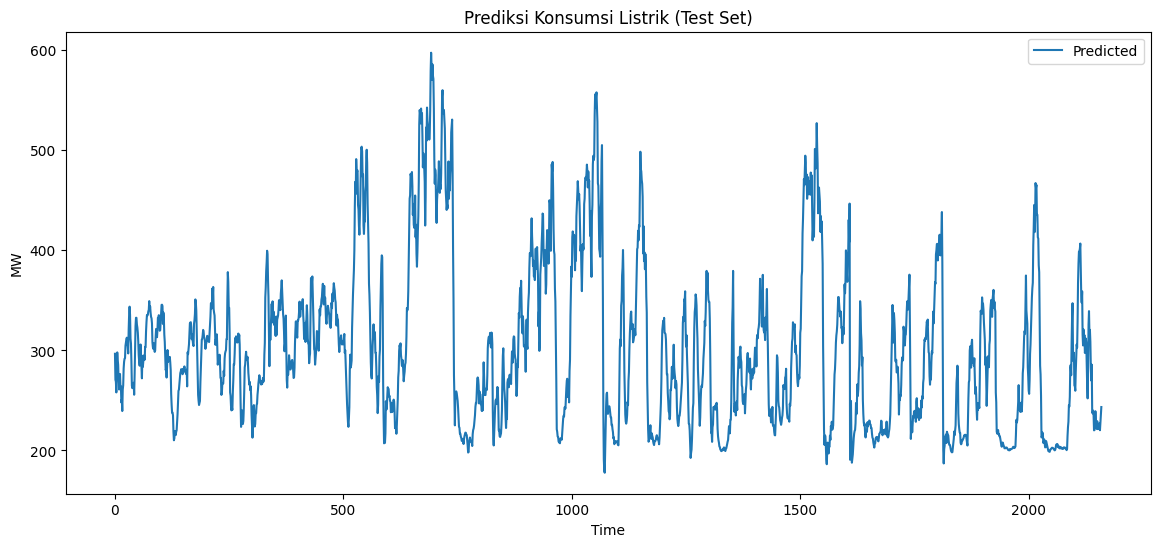

In [117]:
# Visualisasi hasil
plt.figure(figsize=(14,6))
plt.plot(final_predictions, label="Predicted")
plt.title("Prediksi Konsumsi Listrik (Test Set)")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.show()

### XGBoost

In [118]:
# Ambil 24 jam terakhir dari data training sebagai "bekal" untuk membuat fitur di data test
historic_data = df_train_xgb.tail(24)

# Gabungkan data historis dengan data test
combined_for_pred = pd.concat([historic_data, df_test.rename(columns={'dampak_lingkungan_A_True': 'dampak_lingkungan_A', 'dampak_lingkungan_B_True': 'dampak_lingkungan_B', 'dampak_lingkungan_C_True': 'dampak_lingkungan_C'})])
combined_for_pred['konsumsi_listrik'] = combined_for_pred['konsumsi_listrik'].fillna(0) # Isi sementara kolom target di data test

# Buat fitur untuk data gabungan ini
df_test_featured = create_features_for_tree_models(combined_for_pred)

# Ambil hanya baris yang sesuai dengan data test asli
X_final_predict = df_test_featured[features_xgb].iloc[24:] # Skip 24 baris pertama (data historis)

# Lakukan prediksi final
print("\n🚀 Melakukan prediksi pada data test untuk submission...")
final_predictions_xgb = xgb_reg.predict(X_final_predict)
print("✅ Prediksi final selesai.")

# Ekspor hasil prediksi menggunakan fungsi Anda
export_prediction(final_predictions_xgb, test_ids, filename="submission_xgb.csv")


🚀 Melakukan prediksi pada data test untuk submission...
✅ Prediksi final selesai.
📦 Memulai proses ekspor ke file 'submission_xgb.csv'...
   - DataFrame submission berhasil dibuat.

🎉 Berhasil! File 'submission_xgb.csv' telah disimpan.

Berikut adalah 5 baris pertama dari file Anda:


,ID,konsumsi_listrik
0,32184,176.418106
1,32185,176.418106
2,32186,176.418106
3,32187,176.383209
4,32188,176.002823


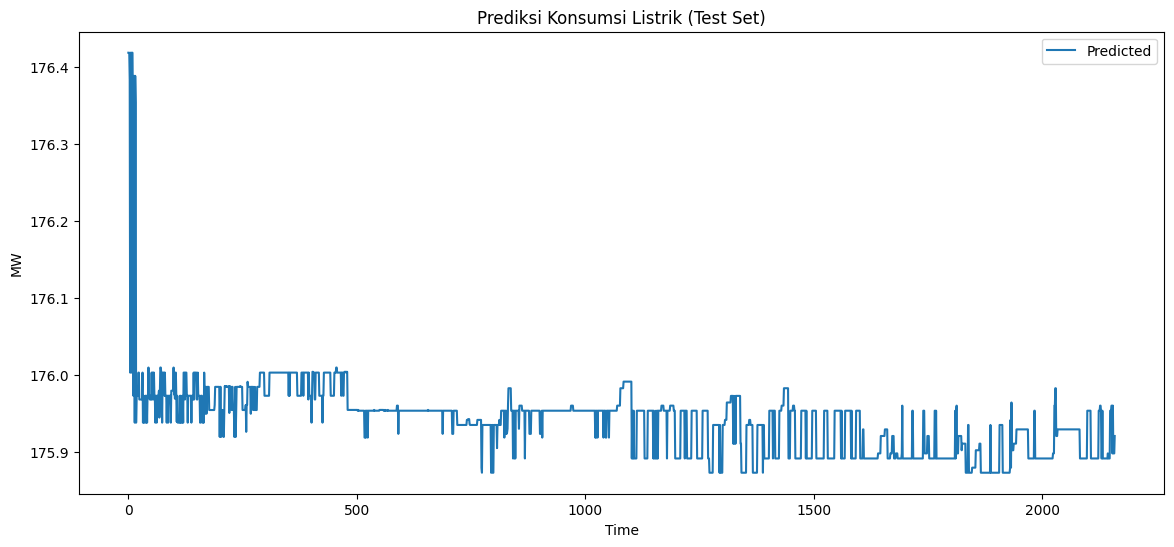

In [119]:
# Visualisasi hasil
plt.figure(figsize=(14,6))
plt.plot(final_predictions_xgb, label="Predicted")
plt.title("Prediksi Konsumsi Listrik (Test Set)")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.show()

### LightGBM

In [120]:
# Ambil data historis yang cukup untuk membuat fitur (misal 168 jam = 7 hari)
historic_data = df_train_lgbm.tail(168)

# Gabungkan data historis dengan data test
combined_for_pred = pd.concat([historic_data, df_test.rename(columns={'dampak_lingkungan_A_True': 'dampak_lingkungan_A', 'dampak_lingkungan_B_True': 'dampak_lingkungan_B', 'dampak_lingkungan_C_True': 'dampak_lingkungan_C'})])

# Isi sementara target di data test untuk membuat fitur lag/rolling
combined_for_pred['konsumsi_listrik'] = combined_for_pred['konsumsi_listrik'].fillna(0)

# Buat fitur
df_test_featured = create_comprehensive_features(combined_for_pred)

# Ambil hanya baris yang merupakan data test
X_final_predict = df_test_featured[features_lgbm].iloc[168:] # Skip data historis

# Prediksi final
print("\n🚀 Melakukan prediksi pada data test untuk submission...")
final_predictions_lgbm = lgbm_reg.predict(X_final_predict)
print("✅ Prediksi final selesai.")

# Ekspor hasil
export_prediction(final_predictions_lgbm, test_ids, filename="submission_lgbm_advanced.csv")


🚀 Melakukan prediksi pada data test untuk submission...
✅ Prediksi final selesai.
📦 Memulai proses ekspor ke file 'submission_lgbm_advanced.csv'...
   - DataFrame submission berhasil dibuat.

🎉 Berhasil! File 'submission_lgbm_advanced.csv' telah disimpan.

Berikut adalah 5 baris pertama dari file Anda:


,ID,konsumsi_listrik
0,32184,204.160863
1,32185,210.773618
2,32186,204.060059
3,32187,208.219089
4,32188,208.341595


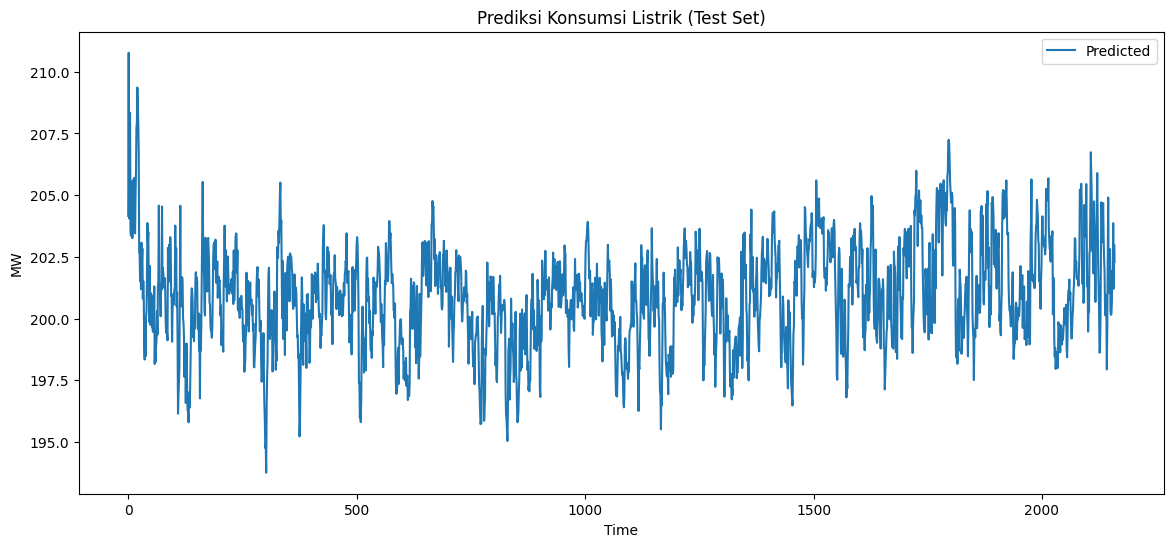

In [121]:
# Visualisasi hasil
plt.figure(figsize=(14,6))
plt.plot(final_predictions_lgbm, label="Predicted")
plt.title("Prediksi Konsumsi Listrik (Test Set)")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.show()